# Exercise 1

In [1]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
import pandas as pd
import numpy as np


In [2]:
corpus = ["This is good pizza", "I love Italian pizza", "The best pizza", "nice pizza", "Excellent pizza", "I love pizza", "The pizza was alright", "disgusting pineapple pizza", "not good pizza", "bad pizza", "very bad pizza", "I had better pizza"]
# this is the corpus


labels = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0] # manually defining the class lables
labels = np.array(labels)


In [3]:
corp_df = pd.DataFrame({'text': corpus, 'sentiment': labels}) # creating the dataframe

In [4]:
corp_df.head()


,text,sentiment
0,This is good pizza,1
1,I love Italian pizza,1
2,The best pizza,1
3,nice pizza,1
4,Excellent pizza,1


In [5]:
enc_corp = [one_hot(sentence, 80) for sentence in corpus] # encoding the corpus with random vocab size of 80


In [6]:
max_len = 0
for s in corpus:
    sent_len = len(s.split())
    if sent_len > max_len:
        max_len = sent_len # getting the lenght of the biggest sentence

In [7]:
print(max_len)

4


In [8]:
padd_corp = pad_sequences(enc_corp, maxlen=max_len, padding='post') # padding part
padd_corp = np.array(padd_corp) # converting to numpy array


In [9]:
print(padd_corp)

[[50 16 73 33]
 [22 34 65 33]
 [57 13 33  0]
 [15 33  0  0]
 [38 33  0  0]
 [22 34 33  0]
 [57 33  6 72]
 [20 71 33  0]
 [72 73 33  0]
 [12 33  0  0]
 [ 7 12 33  0]
 [22 75 13 33]]


In [10]:
model = Sequential() # defining the model
model.add(Embedding(input_dim=80, output_dim=8, input_length=max_len)) # here I'm giving max_len(which is 4 for me)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc']) # compiling
model.fit(padd_corp, labels, epochs=50, verbose=1) # training the model for 50 epochs


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - acc: 0.7500 - loss: 0.6830
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.7500 - loss: 0.6809
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - acc: 0.7500 - loss: 0.6788
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - acc: 0.7500 - loss: 0.6767
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - acc: 0.7500 - loss: 0.6746
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - acc: 0.7500 - loss: 0.6725
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 0.7500 - loss: 0.6704
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - acc: 0.7500 - loss: 0.6683
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - acc: 0.7500 - loss: 0.6661
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - acc: 0.7500 - loss: 0.6640
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - acc: 0.7500 - loss: 0.6619
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.8333 - loss: 0.6597
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 0.8

## Conclusion: with the relatively small dataset the accuracy can be high but it's performance may decline for larger datasets because of limited vocabulary

## Exercise 2

In [12]:
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
tw_dt = pd.read_csv('/content/drive/MyDrive/Tweets.csv') # reading the file


In [15]:
print(tw_dt.head()) # checking the data


       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           neutral                        1.0000   
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

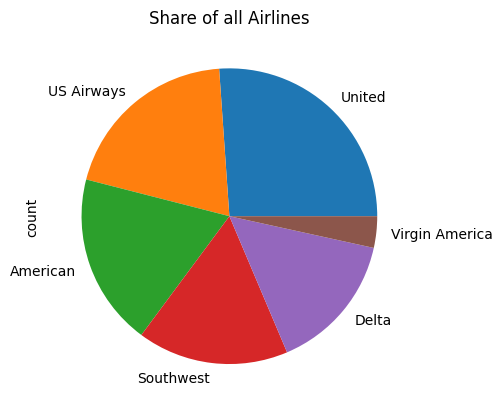

In [16]:
airline_counts = tw_dt['airline'].value_counts()
airline_counts.plot(kind='pie')
plt.title('Share of all Airlines')
plt.show()


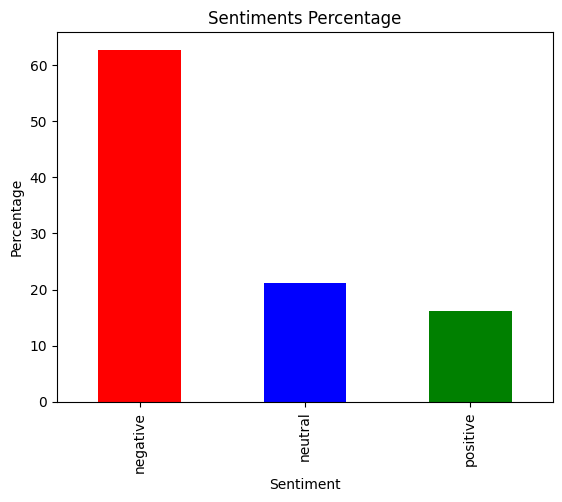

In [17]:
sentiment_counts = tw_dt['airline_sentiment'].value_counts(normalize=True) * 100 # plotting share distribution of airlines in percentages
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiments Percentage')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()




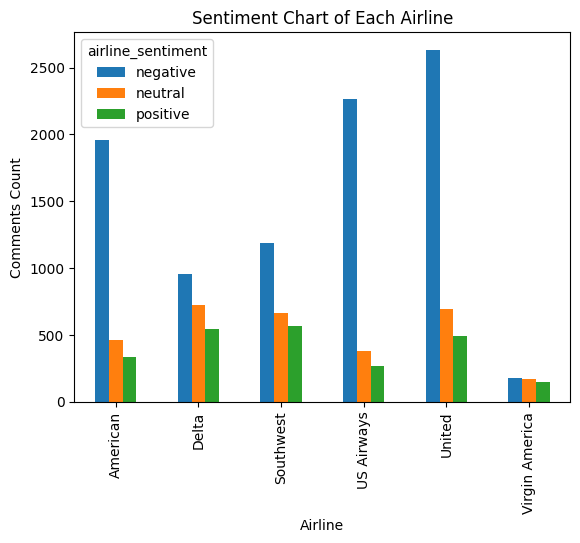

In [18]:
sentiment_airline_counts = tw_dt.groupby(['airline', 'airline_sentiment']).size().unstack() # the sentiment chart
sentiment_airline_counts.plot(kind='bar')
plt.title('Sentiment Chart of Each Airline')
plt.xlabel('Airline')
plt.ylabel('Comments Count')
plt.show()


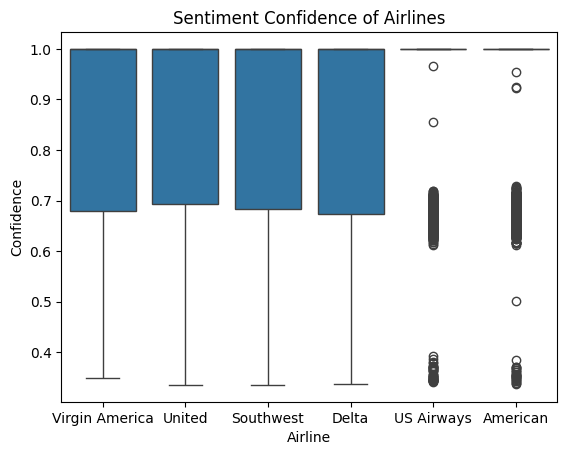

In [19]:
sns.boxplot(x='airline', y='airline_sentiment_confidence', data=tw_dt) # the confidence plot
plt.title('Sentiment Confidence of Airlines')
plt.xlabel('Airline')
plt.ylabel('Confidence')
plt.show()


In [20]:
X = tw_dt['text']  # defining the feature and the label
y = tw_dt['airline_sentiment']


In [21]:

def clean_tweets(t): # cleaning the tweets
    tweet = re.sub(r'http\S+', '', t)  # removing URLs,mentions, hashtags, numbers, and punctuation
    tweet = re.sub(r'@\w+', '', t)
    tweet = re.sub(r'#\w+', '', t)
    tweet = re.sub(r'\d+', '', t)
    tweet = re.sub(r'[^\w\s]', '', t)
    return t.lower()

X = X.apply(clean_tweets)


In [22]:
vectorizer = CountVectorizer(max_features=1000, stop_words='english') # Vectorizing
X_vectorized = vectorizer.fit_transform(X).toarray()


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42) # splitting the data


In [24]:
model = RandomForestClassifier() # creating the model instance & training
model.fit(X_train, y_train)


RandomForestClassifier()

In [25]:
predictions = model.predict(X_test) # predicting


In [26]:

conf_matrx = confusion_matrix(y_test, predictions) # generating the Confusion Matrix
print(conf_matrx)

class_rept = classification_report(y_test, predictions) # generating the Classification report
print(class_rept)

accuracy = accuracy_score(y_test, predictions) # calculating the accuracy
print("Accuracy: ", accuracy)


[[1603  205   81]
 [ 214  299   67]
 [  90   72  297]]
              precision    recall  f1-score   support

    negative       0.84      0.85      0.84      1889
     neutral       0.52      0.52      0.52       580
    positive       0.67      0.65      0.66       459

    accuracy                           0.75      2928
   macro avg       0.68      0.67      0.67      2928
weighted avg       0.75      0.75      0.75      2928

Accuracy:  0.7510245901639344


## Conclusion: From the report it is clear that it is performing well on negative sentiment with f1 score of 84% and accuracy of 74% but not so good in other cases(sentiments) this can be due to the limited dataset. The performance can be improved by large and balanced datasets.